In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Flatten, Dense, Lambda, Reshape, add, Dropout
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
print('imported')

imported


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = x_train / 255
x_test  = x_test / 255
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
print(type(x_train))
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


(60000, 28, 28, 1)

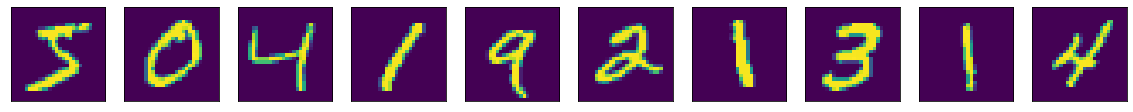

In [ ]:
x_train_noisy = x_train + np.random.rand(60000,28,28,1)*0.9
x_test_noisy = x_test + np.random.rand(10000,28,28,1)*0.9
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

def plot(x,p,labels=False):
    plt.figure(figsize=(20,2))
    #index = np.random.randint(0,len(x_train)) #if u write index here then same written numbers will get display
    for i in range(10):
        plt.subplot(1,10,i+1)
        #index = np.random.randint(0,len(x_train)) #and here diffenert written numbers will get display
        plt.imshow(x[i].reshape(28,28))
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
plot(x_train,None)

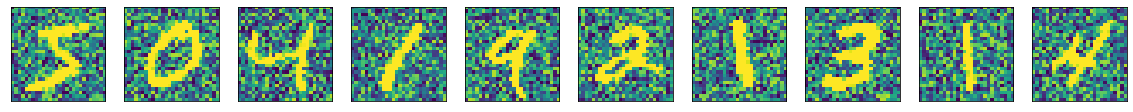

In [ ]:
plot(x_train_noisy,y_train)

In [ ]:
reshape_x_train = x_train.reshape(60000,784)
reshape_x_test = x_test.reshape(10000,784)
reshape_x_train_noisy = x_train_noisy.reshape(60000,784)
reshape_x_test_noisy = x_test_noisy.reshape(10000,784)
classifier = Sequential([Dense(512,activation='relu',input_shape=(784,)),
                         Dense(512,activation='relu'),
                         Dense(256,activation='relu'),
                         Dense(256,activation='relu'),
                         Dense(128,activation='relu'),
                         Dense(10,activation='softmax')])
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 895,882
Trainable params: 895,882
Non-trainable params: 0
__________________________________________________

In [ ]:
classifier.fit(reshape_x_train,y_train,batch_size=512,epochs=3)

Epoch 1/3
118/118 [==============================] - 7s 53ms/step - loss: 0.3512 - accuracy: 0.8980
Epoch 2/3
118/118 [==============================] - 6s 52ms/step - loss: 0.1089 - accuracy: 0.9671
Epoch 3/3
118/118 [==============================] - 6s 52ms/step - loss: 0.0723 - accuracy: 0.9775


In [ ]:
loss,acc = classifier.evaluate(reshape_x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9736
0.08501603454351425
0.9735999703407288


In [ ]:
loss,acc = classifier.evaluate(reshape_x_test_noisy,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 6.1834 - accuracy: 0.2000
6.183379650115967
0.20000000298023224


In [ ]:
classifier.predict(reshape_x_test)

array([[6.0235429e-06, 9.1129249e-07, 1.1769087e-05, ..., 9.9994230e-01,
        9.7206896e-07, 1.7818376e-05],
       [1.1174278e-06, 3.0400112e-04, 9.9962914e-01, ..., 1.0975066e-05,
        5.0523468e-06, 4.3466790e-09],
       [4.9655009e-05, 9.9622166e-01, 2.6210549e-04, ..., 1.3441184e-03,
        5.7966734e-04, 1.7304803e-05],
       ...,
       [2.7572305e-08, 1.7648506e-07, 2.2733644e-07, ..., 5.9874696e-06,
        4.7555446e-07, 6.4973199e-07],
       [5.1997756e-07, 2.1401752e-07, 4.3100719e-08, ..., 4.9794647e-07,
        2.9536728e-05, 1.3642132e-07],
       [9.4370327e-05, 4.7070574e-07, 8.3455994e-08, ..., 8.2629988e-08,
        1.2660904e-07, 6.0348093e-08]], dtype=float32)

In [ ]:
classifier.predict(reshape_x_test_noisy)

array([[1.6456366e-05, 2.8790575e-05, 6.8442944e-07, ..., 1.5721604e-04,
        9.9088742e-05, 1.6696238e-05],
       [2.9601158e-06, 5.9241171e-05, 2.4670805e-06, ..., 3.5046369e-06,
        1.4094092e-04, 2.8791760e-06],
       [1.8146666e-05, 1.7079705e-04, 2.2549330e-05, ..., 9.0444264e-05,
        2.0030674e-03, 4.4840526e-06],
       ...,
       [9.8089495e-06, 8.9016401e-05, 2.3359582e-05, ..., 9.3770941e-05,
        2.7022328e-02, 8.8418947e-06],
       [1.1025613e-07, 8.5294696e-06, 6.4139812e-07, ..., 2.0720288e-06,
        1.7424439e-04, 3.7781044e-07],
       [3.9694146e-03, 1.5289203e-05, 9.8725013e-07, ..., 8.3889419e-05,
        3.5986332e-03, 6.4473403e-05]], dtype=float32)

In [ ]:
input_img = Input(shape=(28,28,1)) #(256,256,3)
encoder1 = Conv2D(7, (3, 3), padding='same', activation='relu', 
             activity_regularizer=regularizers.l1(10e-10))(input_img)
encoder2 = Conv2D(7, (3, 3), padding='same', activation='relu', 
             activity_regularizer=regularizers.l1(10e-10))(encoder1)

encoder3 = MaxPooling2D(padding='same')(encoder2)
encoder4 = Dropout(0.3)(encoder3)
encoder5 = Conv2D(14, (3, 3),  padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(encoder4)
encoder6 = Conv2D(14, (3, 3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(encoder5)

encoder7 = MaxPooling2D(padding='same')(encoder6)
encoded = Conv2D(28, (3, 3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(encoder7)
    

decoder1 = UpSampling2D()(encoded)

decoder2 = Conv2D(14, (3, 3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(decoder1)
decoder3 = Conv2D(14, (3, 3), padding='same', activation='relu',
              activity_regularizer=regularizers.l1(10e-10))(decoder2)

decoder4 = add([encoder5, decoder3])
decoder5 = UpSampling2D()(decoder4)
decoder6 = Conv2D(7, (3, 3), padding='same', activation='relu',
              activity_regularizer=regularizers.l1(10e-10))(decoder5)
decoder7 = Conv2D(7, (3, 3), padding='same', activation='relu',
              activity_regularizer=regularizers.l1(10e-10))(decoder6)

decoder8 = add([decoder7, encoder2])
    
    
decoded = Conv2D(1, (3, 3), padding='same', activation='sigmoid', 
                  activity_regularizer=regularizers.l1(10e-10))(decoder8)   
 
''' if relu is used loss:0.0057 and acc:0.8143, if sigmoid is used loss:0.0049and acc:0.8159 
    due to decrease in loss for sigmoid, a little bit of higher denoised image is obtained and hence better to use sigmoid in last layer '''
                                                                             


' if relu is used loss:0.0057 and acc:0.8143, if sigmoid is used loss:0.0049and acc:0.8159 \n    due to decrease in loss for sigmoid, a little bit of higher denoised image is obtained and hence better to use sigmoid in last layer '

In [ ]:
c_ae = Model(input_img, decoded, name='c_vae')
c_ae.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
c_ae.summary()

Model: "c_vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 7)    70          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 7)    448         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 7)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
h = c_ae.fit(x_train_noisy,x_train,
                epochs=50,                  #take epochs as 100
                batch_size=512,
                #steps_per_epoch=118       #60000/512=118
                validation_split=0.2,      #60000*0.2=12000
                verbose=1,                 #verbose maybe 0,1 or 2
                #validation_data=(x_test_noisy,x_test),shuffle=True
                #callbacks=[EarlyStopping(monitor='val_loss',patience=3)]
                )

Epoch 1/50
94/94 [==============================] - 6s 63ms/step - loss: 0.0043 - accuracy: 0.8152 - val_loss: 0.0043 - val_accuracy: 0.8161
Epoch 2/50
94/94 [==============================] - 6s 61ms/step - loss: 0.0043 - accuracy: 0.8152 - val_loss: 0.0044 - val_accuracy: 0.8161
Epoch 3/50
94/94 [==============================] - 6s 61ms/step - loss: 0.0043 - accuracy: 0.8152 - val_loss: 0.0044 - val_accuracy: 0.8161
Epoch 4/50
94/94 [==============================] - 6s 61ms/step - loss: 0.0043 - accuracy: 0.8153 - val_loss: 0.0044 - val_accuracy: 0.8161
Epoch 5/50
94/94 [==============================] - 6s 62ms/step - loss: 0.0043 - accuracy: 0.8153 - val_loss: 0.0043 - val_accuracy: 0.8161
Epoch 6/50
94/94 [==============================] - 6s 62ms/step - loss: 0.0043 - accuracy: 0.8153 - val_loss: 0.0043 - val_accuracy: 0.8161
Epoch 7/50
94/94 [==============================] - 6s 62ms/step - loss: 0.0043 - accuracy: 0.8153 - val_loss: 0.0043 - val_accuracy: 0.8161
Epoch 8/50
94

In [ ]:
loss,acc = c_ae.evaluate(x_test_noisy,x_test)
print(loss)
print(acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0042 - accuracy: 0.8144
0.004247302655130625
0.814428448677063


In [ ]:
loss,acc = c_ae.evaluate(x_test,x_test)
print(loss)
print(acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0156 - accuracy: 0.8143
0.01558712124824524
0.8143219351768494


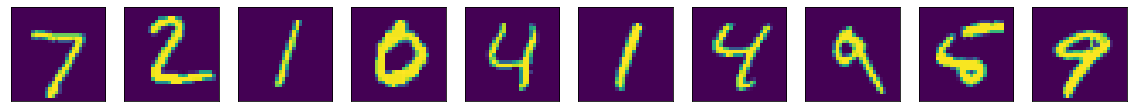

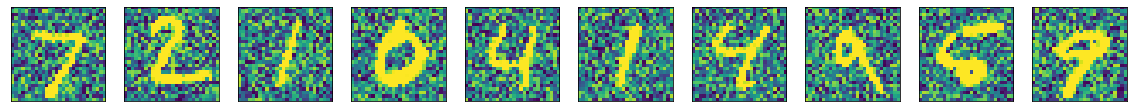

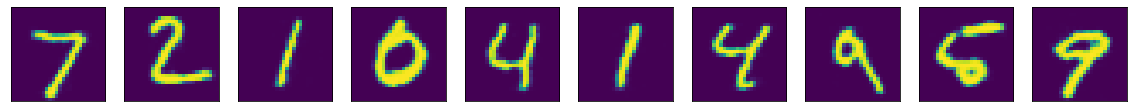

In [ ]:
prediction = c_ae.predict(x_test_noisy)
#plot(x_train,y_train)
#plot(x_train_noisy,y_train)
plot(x_test,y_test)
plot(x_test_noisy,y_test)
plot(prediction,y_test)

In [ ]:
reshape_prediction = prediction.reshape(10000,784)
loss,acc = classifier.evaluate(reshape_prediction,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9725
0.09111839532852173
0.9725000262260437


In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

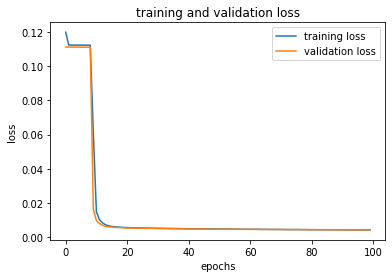

In [ ]:
plt.plot(h.history['loss'],label = 'training loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

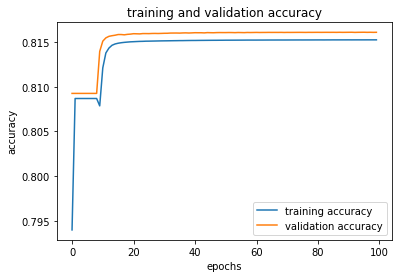

In [ ]:
plt.plot(h.history['accuracy'],label = 'training accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

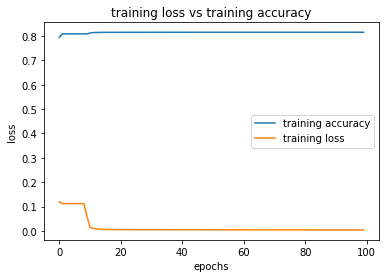

In [ ]:
plt.plot(h.history['accuracy'],label = 'training accuracy')
plt.plot(h.history['loss'],label = 'training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training loss vs training accuracy')
plt.legend()
plt.show()

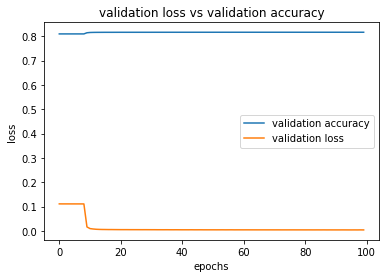

In [ ]:
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('validation loss vs validation accuracy')
plt.legend()
plt.show()